In [1]:
from PIL import Image
import numpy as np
import shapely.geometry
import geopandas as gpd
import matplotlib as plt
from geo.structures.pq_v2 import PriorityQueue
from geo.structures.avltree import AVLTree
%matplotlib inline

In [2]:
L = ["s","egd","lhkfg","fg","s","ashf","r","re"]
# L = [0,1,2,7,3,8,9]
pq = PriorityQueue(lambda x: len(x))
for l in L:
    pq.enq(l)
while not pq.is_empty():
    print(pq.deq())

r
s
s
re
fg
egd
ashf
lhkfg


In [3]:
img = Image.open("../geo/locations/assets/MRT_Route_Map_CR_phase_1.png")
arr = np.array(img)
height = arr.shape[0]
width = arr.shape[1]

In [4]:
eligible = []
for row in range(height):
    for col in range(width):
        color = arr[row][col]
        if color[0] == 149 and color[1] == 214 and color[2] == 6:
            eligible.append((row, col))

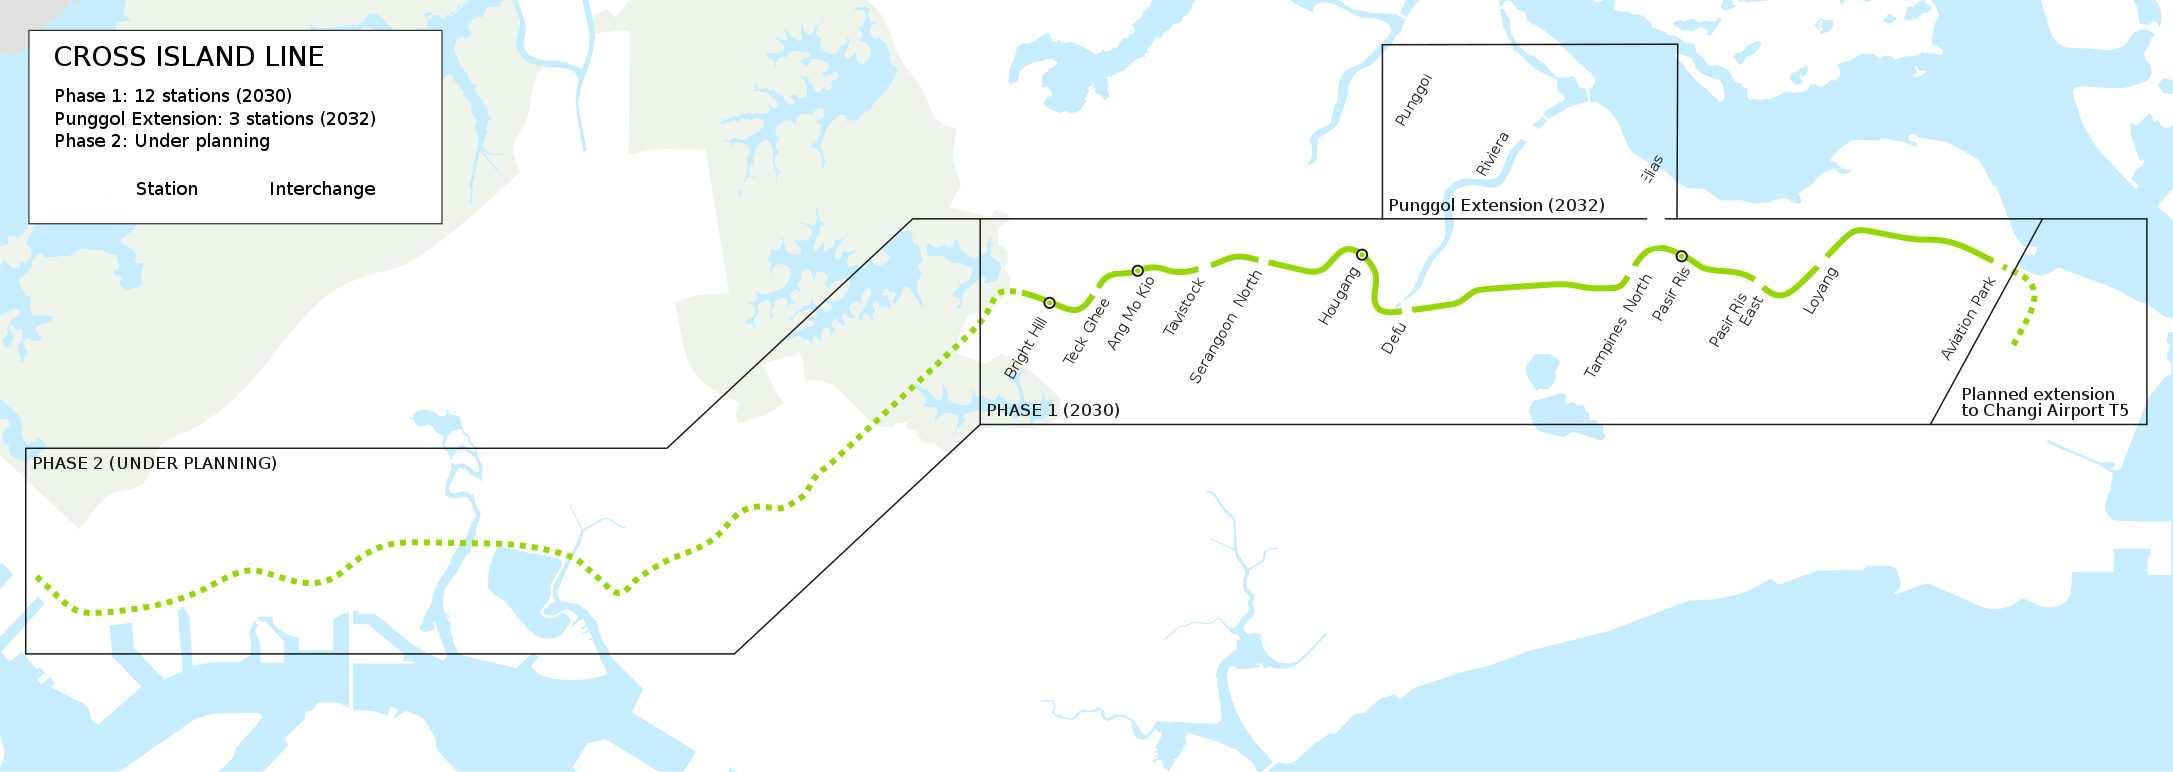

In [5]:
Image.fromarray(arr, "RGBA")

In [6]:
eligible
min_ = 2
max_ = 30
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def dist(self, point):
        return ((self.x-point.x)**2+(self.y-point.y)**2)**0.5
    def __hash__(self):
        return hash(str(self.x) + str(self.y))
class Estimate:
    def __init__(self, point):
        self.point = point
        self.dist = float("inf")
        self.depth = float("-inf")
        self.visited = False
        self.parent = None
    def __hash__(self):
        return hash(self.point)
estimates_set = {Estimate(Point(*e)) for e in eligible}
pq = PriorityQueue(comparator=lambda estimate: estimate.dist)

start = estimates_set.pop()
start.dist = 0
pq.enq(start)

while not pq.is_empty():
    next_ = pq.deq()
    print(next_)
    next_.visited = True
    new_estimates_set = set(estimates_set)
    if next_ in new_estimates_set:
        new_estimates_set.remove(next_)
    for estimate in estimates_set:
        if not estimate.visited:
            dist = next_.point.dist(estimate.point)
            if dist < min_:
                estimate.visited = True
                new_estimates_set.remove(estimate)
            elif estimate.dist > dist and dist < max_:
                temp_dist = estimate.dist
                estimate.dist = dist
                pq.update(estimate)
    estimates_set = new_estimates_set

IndexError: pop from empty list

In [24]:
pq = PriorityQueue(lambda x: x.dist)
for e in estimates_set:
    pq.enq(e)
e = estimates_set.pop()
temp = e.dist
pq.update(e, temp)
while not pq.is_empty():
    print(pq.deq())

In [15]:
for key in pq.keys:
    print(len(pq.keys[key]))

0
103
108
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
196
292
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
0
0
1
0
0
1
0
0
0
0
1
1
0
9
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
1
0
1
0
1
0
0
1
0
0
0
0
0
1
0
0
1
1
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
1
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
1
0
0
0
1
0
0
0
0
2
1
1
0
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1


In [8]:
L1 = [2,3,4]
L2 = list(L1)
L1.append(3)
L2

[2, 3, 4]

In [18]:
pq.tree.get_min_value_node(pq.tree.root).key

0

In [75]:
for k, v in depths.items():
    if v != float("-inf"):
        print(v)

0
1
2
3
4
123
124
125
126
13
12
11
10
9
8
7
6
5
44
45
46
47
122
132
133
17
16
15
14
37
38
39
40
41
42
43
50
49
48
54
55
35
36
120
121
134
20
19
18
32
33
34
51
52
53
56
59
60
61
118
119
135
24
23
22
21
30
31
29
57
58
63
62
68
69
70
71
116
117
136
25
26
27
28
65
64
66
67
74
73
72
79
80
81
82
114
115
137
75
76
77
78
85
84
83
90
91
92
93
111
112
113
138
86
87
88
89
96
95
94
101
102
103
104
105
106
107
108
109
110
140
139
97
98
99
100
150
149
148
147
146
145
144
143
142
141
151
152
153
154
155
156
129
128
131
130
127


In [7]:
set({6})

{6}

In [199]:
def join(eligible, _min, _max):
    

7125

In [54]:
set_ = {5,6,7,8,9}
for s in set_:
    if s == 6:
        set_.remove(s)

RuntimeError: Set changed size during iteration

In [204]:
sorted(d, key=lambda x: x[1])

[(1, 0), (0, 1), (0, 2)]

In [289]:
L = [1,2,3,4,5,6,7,8,9,10]
quick_select(L, 5, comparator=lambda x: abs(x))

5

In [279]:
quick_sort(L, comparator=lambda x: abs(x))

[1, 1, 2, 3, 3, -4, 5, 5, -6, 6, -7, 7, 8, 8, -9, -67, -94]

In [10]:
median_with_left_right([1, 0, 2])

([0], 1, [2])

In [1]:
from geo.locations.planning import PlanningAreas
from geo.locations.mall import Malls

In [2]:
PA = PlanningAreas.get()
M = Malls.get()

In [10]:
M.kdtree.in_order()

[<Mall: Viva Vista>,
 <Mall: Alexandra Retail Centre>,
 <Mall: Queensway Shopping Centre>,
 <Mall: Anchorpoint>,
 <Mall: Resorts World Sentosa>,
 <Mall: HarbourFront Centre>,
 <Mall: VivoCity>,
 <Mall: Tiong Bahru Plaza>,
 <Mall: Great World City>,
 <Mall: West Coast Plaza>,
 <Mall: Wheelock Place>,
 <Mall: The Star Vista>,
 <Mall: Shaw Centre>,
 <Mall: Wisma Atria>,
 <Mall: ION Orchard>,
 <Mall: Far East Plaza>,
 <Mall: Lucky Plaza>,
 <Mall: 100 AM>,
 <Mall: Icon Village>,
 <Mall: People's Park Complex>,
 <Mall: Liang Court>,
 <Mall: Tanjong Pagar Centre>,
 <Mall: Chinatown Point>,
 <Mall: Plaza Singapura>,
 <Mall: Orchard Gateway>,
 <Mall: Cathay Cineleisure Orchard>,
 <Mall: Ngee Ann City>,
 <Mall: The Paragon>,
 <Mall: Mandarin Gallery>,
 <Mall: Orchard Central>,
 <Mall: 313@Somerset>,
 <Mall: The Centrepoint>,
 <Mall: Holland Road Shopping Centre>,
 <Mall: FairPrice Hub>,
 <Mall: JCube>,
 <Mall: Taman Jurong Shopping Centre>,
 <Mall: Jurong Point Shopping Mall>,
 <Mall: Westgate>,

In [8]:
PA.locations_interval_tree.pre_order()

In [11]:
from wilcoxon import sheets

In [12]:
chi = sheets.getVocab("Chinese")

In [13]:
chi.to_csv("../Language/chi_vocab.csv")